## Part 1 - Project Objectives
In this project, I chose to explore the topic of the gym. This is the subject I researched in my first project, but this time I decided to investigate data that I did not create, as I wanted to explore new data that I am not familiar with, in order to conduct a real investigation from the ground up and face challenges that I do not know.

The central question of the project that I will explore is:

**How do the physiological, demographic, and behavioral factors of gym members affect their performance during workouts?**


Sub-questions:
1. Is there a relationship between age and workout experience?
    * Do gym members of different ages burn more or fewer calories during workouts?
    * How does age affect BMI, weight, body fat percentage, and Max BPM?
2. What is the relationship between the type of workout and performance?
    * Is there a difference in the number of calories burned between different types of workouts (such as cardio, HIIT, yoga)?
    * Which type of workout is associated with higher BPM levels?
3. Is there a connection between experience level (Beginner, Intermediate, Expert) and performance metrics (calories, BPM, BMI)?
    * Do gym members with higher experience levels burn more calories?
    * Do gym members with higher experience levelswork with higher BPM?
    * Is there a difference in workout frequency per week based on experience levels?
4. What is the relationship between body fat percentage and workout goals?
    * Do gym members with higher body fat percentages tend to perform different types of workouts (such as cardio versus strength training)?
    * Is there a connection between body fat percentage and the number of calories burned?
5. Do demographic variables like gender affect performance?
    * Is there a difference in the number of calories burned between men and women?
    * How does gender affect workout frequency and duration?
6. Is there a relationship between water intake and performance during workouts?
    * Do members who drink more water during the day burn more calories?
    * Is there a connection between water intake and body fat percentage?
7. What is the impact of BMI on the type of workout chosen?
    * Do gym members with high BMI tend to prefer different types of workouts?
    * Is there a relationship between BMI and workout frequency or workout duration?



The tools and techniques I will use to present the answers to the project questions and its conclusions are: 

**Get Data > ETL - Extract, Transform and Load Data > Analyze Data > Visualization**

That is, I will proceed through the following steps:

 * Data recognition and analysis process – loading and initial review, checking structure and missing values.
 * Data handling and cleaning – dealing with missing/outlier values, changing data types if necessary.
 * Descriptive statistical analysis – calculating averages, medians, standard deviations, identifying outliers.
 * Advanced analysis – exploring trends, categorical analysis, performing aggregation calculations.
 * Visualization – different graphs to illustrate relationships and patterns.
 *  Documentation and conclusions – writing a summary of insights.

## Part 2 - Data analysis process + descriptive statistical analysis
In this section, I will import the dataset that I downloaded from the Kaggle website. After that, I will describe the structure of the dataset and explain in detail the meanings of the columns and the data.

## The Dateset

The columns in this table specify the following metrics:

• **Age**: Age of the gym member.  
• **Gender**: Gender of the gym member (Male or Female).  
• **Weight (kg)**: Member’s weight in kilograms.  
• **Height (m)**: Member’s height in meters.  
• **Max_BPM**: Maximum heart rate (beats per minute) during workout sessions.  
• **Avg_BPM**: Average heart rate during workout sessions.  
• **Resting_BPM**: Heart rate at rest before workout.  
• **Session_Duration (hours)**: Duration of each workout session in hours.  
• **Calories_Burned**: Total calories burned during each session.  
• **Workout_Type**: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).  
• **Fat_Percentage**: Body fat percentage of the member.  
• **Water_Intake (liters)**: Daily water intake during workouts.  
• **Workout_Frequency (days/week)**: Number of workout sessions per week.  
• **Experience_Level**: Level of experience, from beginner (1) to expert (3).  
• **BMI**: Body Mass Index, calculated from height and weight.


In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import datetime as dt
import pyodbc
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
gym = pd.read_csv('data/gym_members_exercise_tracking.csv')

In [3]:
## Displaying initial information about the dataset and the structure of the table:

gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

**Data Structure:**

It can be seen that the database contains 973 rows, ranging from index 0 to 972.

All rows are complete, meaning there are no rows with missing data.

Variable Types: There are 15 columns.

Numerical variables: Age, weight, height, pulse, workout duration, calories, BMI, and more.

Categorical variables: Gender and workout type.

7 columns are defined as float, 6 columns are defined as int, and 2 columns are defined as object.

This means that most of the metrics in this table are numerical metrics.

In [4]:
## Displaying the first five rows of the table:

gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
##Displaying a statistical summary of the numerical columns:

gym.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


**Age Column:**
The average age of the trainees is slightly over 38.7. The youngest age is 18, and the oldest age is 59. It can be seen that 25% of the values are less than 28, 50% of the values are less than 40, and 75% of the values are less than 49. The standard deviation is 12.18, which indicates some variability among the ages, but they are not dispersed extremely.

**Weight and Height Columns:**
The average weight of the trainees is 73.85 kg, with the lowest weight being 40 and the highest weight being 129.9. The average height of the trainees is 1.72 m, with the shortest trainee being 1.50 m and the tallest being 2.00 m. It is very challenging to address these data from the table, as there are significant differences in weight and height between women and men, and I will need to address these separately when analyzing the table data. Therefore, the standard deviation is quite extreme and does not represent a normative standard deviation.

**BPM Columns:**
There are three columns indicating the trainee's pulse: maximum pulse, average pulse, and resting pulse. The first two columns (maximum pulse and average pulse) are measured during exercise, while the third column (resting pulse) is measured before exercise. The average maximum pulse is 179.88 beats per minute, the average pulse during exercise is 143.77 beats per minute, and the average resting pulse is 62.22 beats per minute. I will further examine what these metrics indicate.
The standard deviation for the maximum pulse is 11.53, indicating relatively low variability, meaning most values are close to the average.
The standard deviation for the average pulse is 14.35, showing medium variability, indicating differences among individuals. Therefore, I would like to examine why there is variability among individuals. Is it a matter of gender? Age? Weight? Or other data?
The standard deviation for the resting pulse is 7.33, indicating relatively low variability, which suggests stability in resting pulse.
I will later examine whether the value ranges for the three columns are normal or if there are values that deviate from the recommended ranges.

**Duration of Each Session (Hours):**
The average workout time is 1.25 hours, meaning 75 minutes of training. The shortest workout time is 0.50 hours, which is 30 minutes, while the longest workout time is 2.0 hours, or two hours. The standard deviation of 0.343 indicates relatively low variability, meaning most workouts are similar in length. The median indicates that half of the workouts are shorter than 1.04 hours, while 75% of the workouts are longer than 1.46 hours. Thus, most workouts last between one hour and one and a half hours, with a minimum of half an hour and a maximum of two hours.

**Calories Burned Column:**
The average calories burned during a workout is 905.42, with the minimum value being 303 and the maximum value being 1783. The standard deviation is 272.64, indicating a wide variation among the values. The median is 893, which is very close to the average, indicating that the data distribution is relatively uniform.

**Workout Type Column:**
This column details the various types of workouts done in the gym: yoga, stretching, HIIT, etc.

**Body Fat Percentage Column:**
The average body fat percentage of the trainees is 24.97, with the minimum value being 10 and the maximum value being 35, and the median being 26.2. The range between the trainees is quite wide, and I will examine the reasons for this later.

**Water Intake Column:**
I am not sure if the water intake column is relevant for examining my data, so I am uncertain whether I will use it later in data analysis.

**Workout Frequency Column:**
The average number of workouts per week is 4.1, with the minimum number of workouts being 3.32 and the maximum number being 5. The standard deviation is 0.91, indicating a small dispersion among the values. Most trainees work out between 3-5 times a week, which is also reflected in the median.

**Experience Level Column:**
There are three experience levels, which I will detail later.

**BMI Column:**
The average BMI is 24.9, with the minimum value being 12.32 and the maximum value being 49.84. The standard deviation is 6.66, indicating a large dispersion among the values. The variability in the values and the data dispersion is likely due to differences in weight and physical measurements, as well as differences among various factors (age, gender, type of workout).

In [6]:
## Displaying a statistical summary of the non-numerical columns:

gym.describe(include=['object'])

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


Displaying two columns: gender and workout type. 

There are 973 values in each column. 

In the gender column, there are two values: male and female. 

In the workout type column, there are four types of workouts. 

There are more male trainees (511), and "strength" is the leading workout type with a frequency of 258 times.

In [7]:
## I will check what the four workouts performed in the gym are and how many times each workout appears:

gym['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [8]:
## Checking for duplicate data:

gym.duplicated().sum()

np.int64(0)

## Part 3 - Data Treatment
In this section, I will address missing or anomalous values. 

I will perform necessary transformations on the data. 

I will conduct analyses based on different categories and adjust the data according to my research questions and needs.

In [9]:
## When I executed the info() function and the head() function,
## I noticed that the column names include their values. 
## Since I don’t need them and they will only complicate my code writing later on, 
## I prefer to change the names of the columns that include values:

gym = gym.rename(columns={'Weight (kg)':'Weight', 
                        'Height (m)': 'Height', 
                        'Session_Duration (hours)': 'Session_Duration', 
                        'Water_Intake (liters)':'Water_Intake', 
                        'Workout_Frequency (days/week)':'Workout_Frequency'})

In [10]:
## The workout duration column is displayed in hours as decimal numbers, making it difficult to understand how long the workout lasted. 
##Therefore, I will convert the workout duration to minutes:

gym['Session_Duration'] = gym['Session_Duration'] * 60

In [11]:
## I will check if the changes have been saved:

gym.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,101.4,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,78.0,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,66.6,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,35.4,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,38.4,556.0,Strength,29.2,2.8,3,1,14.39


In [12]:
## When I looked at the describe() function, I could see that there are anomalies in the BMI column.
## It can be seen that the minimum BMI in the table is 12.32, while the maximum BMI is 49.84
## These are extreme anomalies since a BMI considered underweight is 18.5 or lower, while a BMI classified as severe obesity is 40 or higher.
## Therefore, I will check how many data points are below 15 and above 40.
## I will examine the relevant BMI categories, which include age, gender, height, and weight:

bmi_outliers = gym[(gym['BMI']<15)|(gym['BMI']>40)]
bmi_outliers[['Age','Gender','Weight','Height','BMI']]

,Age,Gender,Weight,Height,BMI
4,38,Male,46.1,1.79,14.39
10,41,Male,120.8,1.67,43.31
12,57,Male,112.5,1.61,43.40
15,39,Female,42.5,1.75,13.88
17,41,Female,43.8,1.77,13.98
...,...,...,...,...,...
924,18,Male,118.6,1.64,44.10
925,57,Male,55.7,1.99,14.07
936,54,Male,117.2,1.62,44.66
945,35,Male,127.1,1.62,48.43


In [13]:
## We can see that we have 72 outlier data points in the BMI column:

len(bmi_outliers)

72

In [14]:
## I will check how many of these data points have a BMI lower than 15:

len(gym[gym['BMI']<15])

38

In [15]:
## When we look at the data for BMI below 15, we see values that are not realistic at all.
## For example, if we look at index row 908, we see a 26-year-old man who is 2 meters tall and weighs 51.9 kg.
## This is a person who is severely underweight, and it is unlikely that they would be able to engage in even the slightest physical activity.

gym[gym['BMI']<15]

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
4,38,Male,46.1,1.79,188,158,68,38.4,556.0,Strength,29.2,2.8,3,1,14.39
15,39,Female,42.5,1.75,181,131,52,67.8,740.0,Strength,26.2,2.1,2,1,13.88
17,41,Female,43.8,1.77,182,165,58,71.4,884.0,Cardio,31.9,1.6,3,1,13.98
130,49,Female,45.2,1.74,164,156,73,74.4,870.0,Strength,30.8,2.1,3,2,14.93
147,59,Male,50.3,1.95,188,167,55,64.2,885.0,Strength,24.4,3.4,3,1,13.23
150,45,Male,46.6,1.79,176,168,55,87.6,1214.0,Yoga,22.9,2.4,3,2,14.54
156,56,Female,40.4,1.80,196,165,72,73.8,913.0,Cardio,30.0,2.1,4,2,12.47
169,50,Male,51.1,1.98,171,126,52,55.2,574.0,Yoga,28.0,2.4,2,1,13.03
185,45,Male,51.1,1.87,177,158,57,86.4,1126.0,Cardio,26.2,3.4,4,2,14.61
194,49,Female,40.0,1.65,188,148,74,61.8,686.0,Yoga,34.3,2.5,3,2,14.69


In [16]:
## I will check how many BMI values are greater than 40:

len(gym[gym['BMI']>40])

34

In [17]:
## As I mentioned earlier, a person with a BMI in the range of 30-39.9 is considered obese, while a person with a BMI of 40 or higher is classified as severely obese.
## If we look at index row 854, we see a man who is 1.61 meters tall and weighs 129.2 kg. 
## Therefore, his BMI is nearly 50. In this case as well, it is unlikely that a person with such severe obesity would be able to engage in even the slightest exercise.

gym[gym['BMI']>40]

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
10,41,Male,120.8,1.67,188,146,54,49.2,593.0,HIIT,20.5,3.0,2,1,43.31
12,57,Male,112.5,1.61,195,165,61,74.4,1013.0,Cardio,22.1,2.7,3,2,43.40
35,26,Male,127.6,1.73,167,160,62,79.2,1162.0,Strength,27.3,2.9,3,1,42.63
44,37,Male,124.2,1.76,168,158,50,90.0,1304.0,HIIT,29.3,2.8,2,1,40.10
55,23,Male,114.8,1.60,182,163,60,88.2,1318.0,Cardio,21.7,2.7,4,2,44.84
96,56,Male,129.0,1.78,194,126,64,77.4,805.0,Yoga,27.1,2.7,2,1,40.71
133,21,Male,125.2,1.66,196,159,60,82.8,1207.0,HIIT,29.8,3.4,3,2,45.43
251,33,Male,117.0,1.61,166,130,55,62.4,744.0,HIIT,25.1,2.4,3,2,45.14
261,57,Male,126.8,1.63,161,133,73,57.6,632.0,Yoga,20.8,2.1,2,1,47.72
271,52,Male,105.2,1.62,189,141,61,81.6,949.0,HIIT,27.6,3.2,3,1,40.09


In [18]:
## I will separate the data into underweight and overweight categories so that I can examine them more closely.
## In order to define underweight and overweight, I will divide the groups based on height and weight.
## Additionally, I will refer to the weight data based on the BMI assessment that indicates underweight:

underweight1 = bmi_outliers[(bmi_outliers['Height'].between(1.50,1.60))&(bmi_outliers['Weight']<42)]
underweight2 = bmi_outliers[(bmi_outliers['Height'].between(1.60,1.70))&(bmi_outliers['Weight']<48)]
underweight3 = bmi_outliers[(bmi_outliers['Height'].between(1.70,1.80))&(bmi_outliers['Weight']<54)]
underweight4 = bmi_outliers[(bmi_outliers['Height'].between(1.80,1.90))&(bmi_outliers['Weight']<61)]
underweight5 = bmi_outliers[(bmi_outliers['Height'].between(1.90,2.00))&(bmi_outliers['Weight']<67)]

In [19]:
## It can be seen that there is one data point anomaly between the calculation of BMI < 15 and the underweight groups.
## I will check which row is the outlier and why it did not appear when I checked for BMI < 15:

total_length = len(underweight1) + len(underweight2) + len(underweight3) + len(underweight4) + len(underweight5)
total_length

39

In [20]:
## I will combine all the underweight groups into one variable:

underweight_combined = pd.concat([underweight1, underweight2, underweight3, underweight4, underweight5])

In [21]:
## I will define a variable for the gym participants whose BMI is less than 15:

bmi_under_15 = gym[gym['BMI'] < 15]

In [22]:
## I will find out which additional row appears in the combination of the underweight group:

extra_row = underweight_combined[~underweight_combined.index.isin(gym[gym['BMI'] < 15].index)]
extra_row

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI


In [23]:
## Since I received an empty table but there is still one additional row in the data, I will check if there are duplicate rows in the dataset:

duplicate_indices = underweight_combined.index[underweight_combined.index.duplicated(keep=False)]

In [24]:
## Display of the duplicate rows by index location:

gym.loc[duplicate_indices]

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
156,56,Female,40.4,1.8,196,165,72,73.8,913.0,Cardio,30.0,2.1,4,2,12.47
156,56,Female,40.4,1.8,196,165,72,73.8,913.0,Cardio,30.0,2.1,4,2,12.47


In [25]:
## It can be seen that row number 156 appears twice; I will check why.
## It seems that because the woman in the row is exactly 1.80 meters tall, she falls into the following two groups:
## underweight3=bmi_outliers[(bmi_outliers['Height'].between(1.70,1.80))&(bmi_outliers['Weight']<54)]
## underweight4=bmi_outliers[(bmi_outliers['Height'].between(1.80,1.90))&(bmi_outliers['Weight']<61)]
## There is no need for her to appear twice, so I will remove that row:

underweight_combined = underweight_combined.drop_duplicates()

In [26]:
## I will check that the duplicate row has indeed been removed and that there are now 38 rows in the underweight group:

len(underweight_combined)

38

In [27]:
## Once again, in order to define overweight, I will examine the height and weight data.
## I will refer to the weight data based on the BMI assessment indicating severe obesity:

overweight = bmi_outliers[(bmi_outliers['Height']<1.80)&(bmi_outliers['Weight']>100)]
overweight

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
10,41,Male,120.8,1.67,188,146,54,49.2,593.0,HIIT,20.5,3.0,2,1,43.31
12,57,Male,112.5,1.61,195,165,61,74.4,1013.0,Cardio,22.1,2.7,3,2,43.40
35,26,Male,127.6,1.73,167,160,62,79.2,1162.0,Strength,27.3,2.9,3,1,42.63
44,37,Male,124.2,1.76,168,158,50,90.0,1304.0,HIIT,29.3,2.8,2,1,40.10
55,23,Male,114.8,1.60,182,163,60,88.2,1318.0,Cardio,21.7,2.7,4,2,44.84
96,56,Male,129.0,1.78,194,126,64,77.4,805.0,Yoga,27.1,2.7,2,1,40.71
133,21,Male,125.2,1.66,196,159,60,82.8,1207.0,HIIT,29.8,3.4,3,2,45.43
251,33,Male,117.0,1.61,166,130,55,62.4,744.0,HIIT,25.1,2.4,3,2,45.14
261,57,Male,126.8,1.63,161,133,73,57.6,632.0,Yoga,20.8,2.1,2,1,47.72
271,52,Male,105.2,1.62,189,141,61,81.6,949.0,HIIT,27.6,3.2,3,1,40.09


In [28]:
## It can be seen that the number of individuals in the overweight category is the same as the number of people with a BMI > 40.
## This means that there are no outlier data points, additional rows, or missing rows:

len(overweight)

34

In [29]:
## Since the number of individuals classified as underweight and the number classified as overweight represents about 7.4% of the data in the table, 
## I have decided to remove these data points to avoid skewing the analysis of the data:

drop_underweight1 = gym.drop(underweight1.index, errors='ignore',inplace=True)
drop_underweight2 = gym.drop(underweight2.index, errors='ignore',inplace=True)
drop_underweight3 = gym.drop(underweight3.index, errors='ignore',inplace=True)
drop_underweight4 = gym.drop(underweight4.index, errors='ignore',inplace=True)
drop_underweight5 = gym.drop(underweight5.index, errors='ignore',inplace=True)

In [30]:
## Removing the data of individuals classified as severely overweight:

drop_overweight=gym.drop(overweight.index, errors='ignore',inplace=True)

In [31]:
###### I will check that these 72 rows have indeed been deleted.
## It can be seen that I still have outlier data points; however, since they are realistic, I choose not to delete or modify them:

gym.describe()

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,38.481687,73.220422,1.720111,179.927858,143.465039,62.187569,76.003552,910.240844,24.883796,2.623640,3.345172,1.831299,24.672852
std,12.190112,19.175001,0.128425,11.513389,14.351312,7.341609,20.793599,275.156878,6.416022,0.607167,0.928351,0.751559,5.424594
min,18.000000,40.300000,1.500000,160.000000,120.000000,50.000000,30.000000,303.000000,10.000000,1.500000,2.000000,1.000000,15.020000
25%,28.000000,59.000000,1.620000,170.000000,131.000000,56.000000,63.600000,725.000000,21.100000,2.100000,3.000000,1.000000,20.610000
50%,39.000000,70.100000,1.710000,180.000000,143.000000,62.000000,76.200000,898.000000,26.300000,2.600000,3.000000,2.000000,24.190000
75%,49.000000,85.000000,1.800000,190.000000,156.000000,68.000000,88.200000,1082.000000,29.400000,3.100000,4.000000,2.000000,28.270000
max,59.000000,129.500000,2.000000,199.000000,169.000000,74.000000,120.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,39.770000


Now the table shows 939 rows. We can see that the only columns that have changed are:  
- The weight column, which had a standard deviation of 21.20 and now has a standard deviation of 19.52. Its mean was 73.85 and is now 72.15.  
- The height column, which had a standard deviation of 0.1277 and now has a standard deviation of 0.1292. Its mean remaining almost unchanged.  
- The calories burned column, which had a standard deviation of 272.64 and now has a standard deviation of 273.67. Its mean was 905.42 and is now 906.09.  
- The body fat percentage column, which had a standard deviation of 6.25 and now has a standard deviation of 6.34. Its mean being 24.97 and now 24.98.  
- The column that changed the most is, of course, the BMI column, which had a standard deviation of 6.66 and now has a standard deviation of 5.72. Its mean was 24.91 and is now 24.23.  
- The value that changed significantly is the maximum value, which was 49.84 and is now 39.77.

In [32]:
## I would like to check if there is a continuous range within the age spectrum or if there are any ages missing between 18 and 59. 
## Additionally, I want to see the ratio of men to women in each age group and check for any anomalie:

gym.groupby(['Gender','Age'])[['Age']].count().unstack(level=0)

Age     
Gender Female Male
Age               
18         15   10
19         16   10
20         11   13
21          8   11
22         13   12
23         12   11
24         10    4
25         13   11
26         10    8
27          4   14
28         11   11
29          7   16
30          8   11
31         17    6
32          6   15
33         15    3
34         12   11
35          7    9
36          7   10
37         10    8
38          8    9
39          9   13
40         11   13
41          9   14
42         11   14
43         15   17
44          7    8
45         15   12
46         11    8
47          8   11
48          8    8
49          8   15
50         16   16
51         11    7
52         15   14
53         11   11
54         16   13
55          7    8
56          8   16
57         10    8
58         11    8
59          7   10

## Part 4 - Advanced Data Analysis + Part 5 - Visualizations
After examining the table and cleaning its outlier data, I will now present the project questions and provide answers to them. I will group the data by various dimensions, divide it into groups, perform segmentations, and calculate aggregations according to the questions I have posed.

Before I begin investigating the questions and presenting visualizations, I noticed that many questions relate to the relationship between calorie burn and various trainee variables.  

Therefore, I will first compile all the questions together and present the findings for each one.  
Then, I will create several graphs on the same canvas to visualize these relationships in a consolidated manner.  

I will use bar graphs to compare values between categories and scatter plots to examine the relationships between two quantitative variables.

**Question No.1: Is there a relationship between age and workout experience?**

* Do gym members of different ages burn more or fewer calories during workouts?

In [33]:
## Creating different age groups:

bins = [18, 25, 35, 45, 55, 60] 
labels = ['18-25', '26-35', '36-45', '46-55', '56-59']
gym['Age_Group'] = pd.cut(gym['Age'], bins=bins, labels=labels, right=False)

In [34]:
## Calorie burning by age groups:

age_vs_calories = gym.groupby('Age_Group')[['Calories_Burned']].mean()
age_vs_calories

,Calories_Burned
Age_Group,
18-25,951.557692
26-35,943.712919
36-45,924.421053
46-55,869.123932
56-59,837.301075


**Question No.2: What is the relationship between the type of workout and performance?**
    
* Is there a difference in the number of calories burned between different types of workouts (such as cardio, HIIT, yoga)?

In [35]:
## Average calories burned by workout type:

gym.groupby("Workout_Type")[["Calories_Burned"]].mean()

,Calories_Burned
Workout_Type,
Cardio,882.588983
HIIT,931.677885
Strength,919.151899
Yoga,910.036364


**Question 3: Is there a connection between experience level (Beginner, Intermediate, Expert) and performance metrics (calories, BPM, BMI)?**
    
* Do gym members with higher experience levels burn more calories?

In [36]:
## Average calories burned by experience levels:

gym.groupby("Experience_Level")[["Calories_Burned"]].mean()

,Calories_Burned
Experience_Level,
1,726.871720
2,896.811989
3,1265.340314


**Question No.4: What is the relationship between body fat percentage and workout goals?**

* Is there a connection between body fat percentage and the number of calories burned?

In [37]:
## Creation of groups based on body fat percentage:

fat_bins = [10, 15, 20, 25, 30, 35.1]
fat_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
gym['Fat_Group'] = pd.cut(gym['Fat_Percentage'], bins=fat_bins, labels=fat_labels, right=False)

In [38]:
## Average calories burned by body fat percentage groups:

fat_vs_calories = gym.groupby('Fat_Group')[['Calories_Burned']].mean()
fat_vs_calories

,Calories_Burned
Fat_Group,
Very Low,1327.000000
Low,1200.021978
Moderate,868.118644
High,802.729107
Very High,787.957219


**Question No.5: Do demographic variables like gender affect performance?**

* Is there a difference in the number of calories burned between men and women?


In [39]:
## Average calories burned by gender:

gym.groupby("Gender")[["Calories_Burned"]].mean()

,Calories_Burned
Gender,
Female,866.389640
Male,952.844639


**Since it can be seen that there is a direct relationship between the data and calorie burn during exercise, I would like to ask a few more questions and later present the resulting data in different graphs.**

* Is there a difference in calorie burn according to different BMI groups?

In [40]:
## Creation BMI group:

bmi_bins = [12.32, 18.5, 24.9, 29.9, 40] 
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
gym['BMI_Group'] = pd.cut(gym['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [41]:
bmi_vs_calories = gym.groupby('BMI_Group')[['Calories_Burned']].mean()
bmi_vs_calories

,Calories_Burned
BMI_Group,
Underweight,833.092308
Normal,926.825137
Overweight,921.045455
Obese,918.490798


* Is there a relationship between workout duration and the amount of calories burned? Do longer workouts burn more calories?

In [42]:
## Creating workout duration groups in minutes:

duration_bins = [30, 50, 70, 90, 110, 121]  
duration_labels = ['30-50 minutes', '51-70 minutes', '71-90 minutes', '91-110 minutes', '111-120 minutes']
gym['Duration_Group'] = pd.cut(gym['Session_Duration'], bins=duration_bins, labels=duration_labels, right=False)

In [43]:
## Average calories burned by time groups:

duration_vs_calories = gym.groupby('Duration_Group')[['Calories_Burned']].mean()
duration_vs_calories

,Calories_Burned
Duration_Group,
30-50 minutes,483.154545
51-70 minutes,742.827586
71-90 minutes,958.572603
91-110 minutes,1210.236641
111-120 minutes,1368.634921


* Is there a relationship between workout frequency and calorie burn?

In [44]:
frequency_vs_calories = gym.groupby('Workout_Frequency')[['Calories_Burned']].mean()
frequency_vs_calories

,Calories_Burned
Workout_Frequency,
2,730.869565
3,816.027778
4,999.800687
5,1277.568627


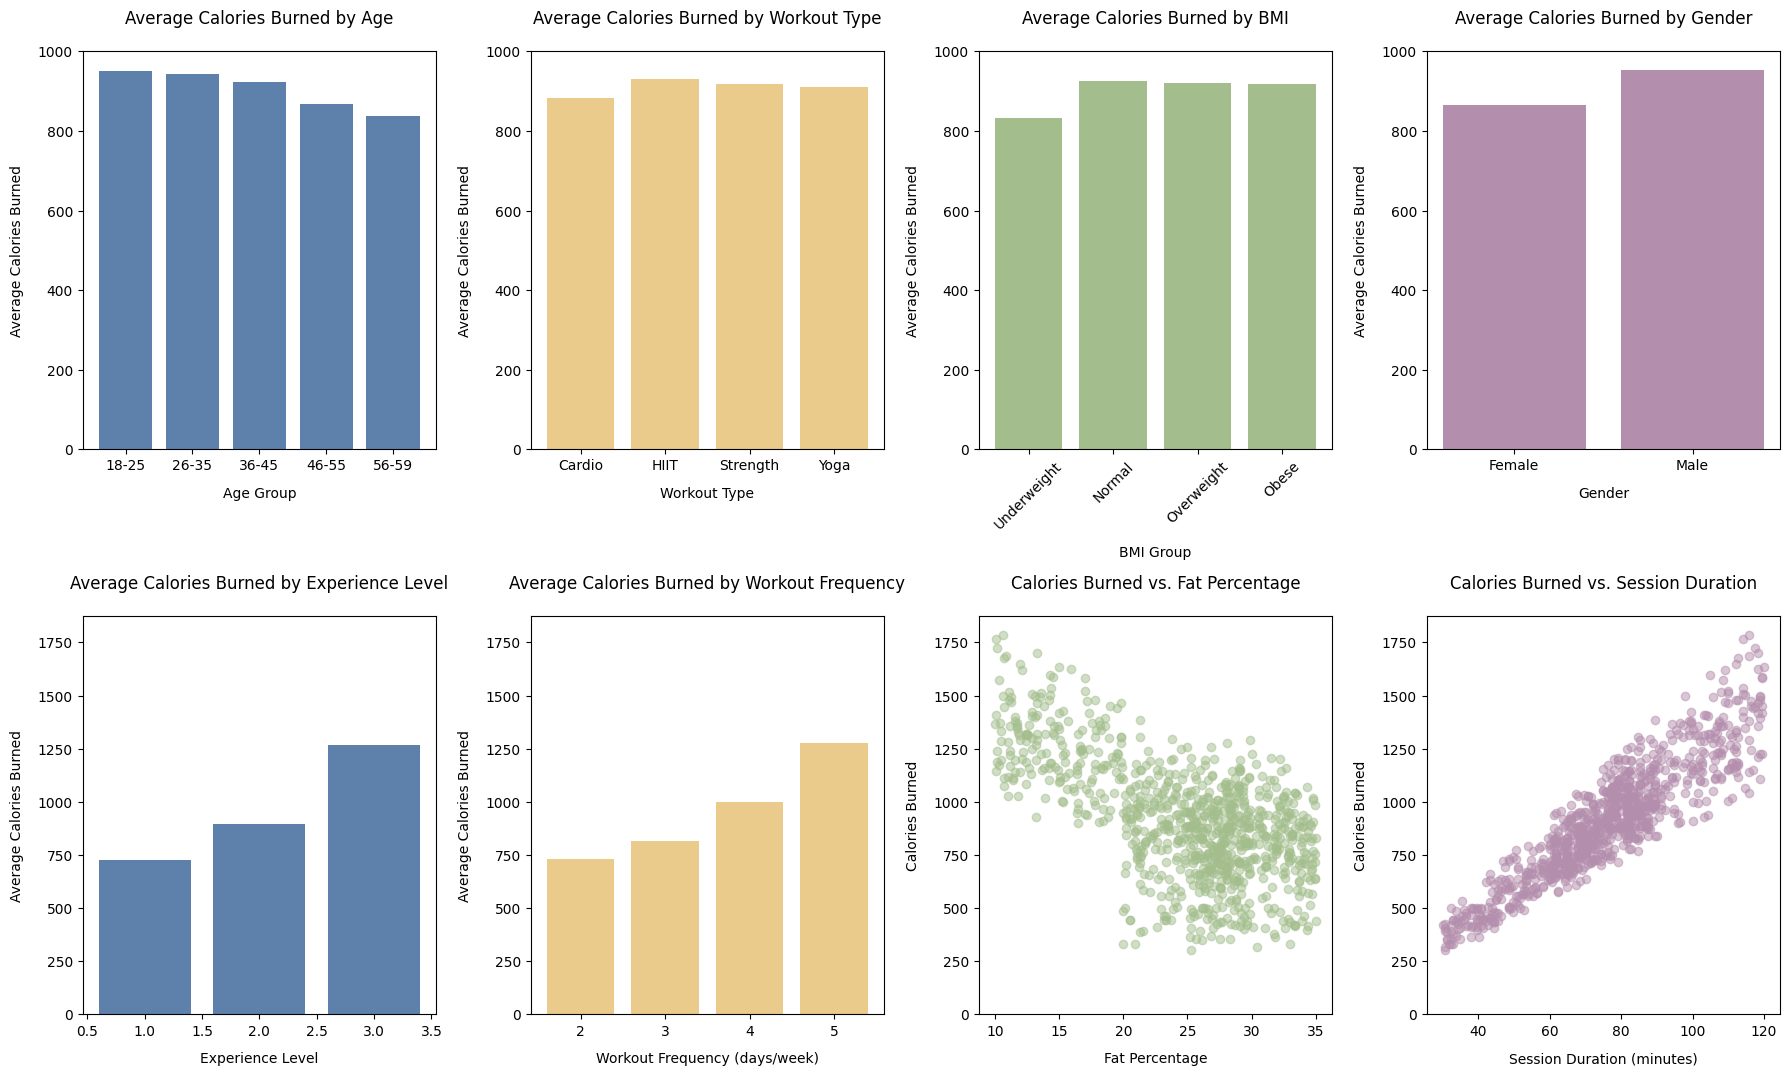

In [45]:
plt.figure(figsize=(18, 16))  

## Age
age_calories = gym.groupby('Age_Group')['Calories_Burned'].mean().reset_index()
ax=plt.subplot(3,4,1)
plt.subplot(3, 4, 1)  
plt.bar(age_calories['Age_Group'], age_calories['Calories_Burned'], color='#5E81AC')
plt.title('Average Calories Burned by Age', pad=20)
plt.xlabel('Age Group', labelpad=10)
plt.ylabel('Average Calories Burned', labelpad=10)

## Workout Type
workout_calories = gym.groupby('Workout_Type')['Calories_Burned'].mean().reset_index()
plt.subplot(3, 4, 2, sharey=ax)
plt.bar(workout_calories['Workout_Type'], workout_calories['Calories_Burned'], color='#EBCB8B')
plt.title('Average Calories Burned by Workout Type', pad=20)
plt.xlabel('Workout Type', labelpad=10)
plt.ylabel('Average Calories Burned', labelpad=10)

## BMI
bmi_calories = gym.groupby('BMI_Group')['Calories_Burned'].mean().reset_index()
plt.subplot(3, 4, 3, sharey=ax)  
plt.bar(bmi_calories['BMI_Group'], bmi_calories['Calories_Burned'], color='#A3BE8C')
plt.title('Average Calories Burned by BMI', pad=20)
plt.xlabel('BMI Group', labelpad=10)
plt.ylabel('Average Calories Burned', labelpad=10)
plt.xticks(rotation=45)  

## Gender
gender_calories = gym.groupby('Gender')['Calories_Burned'].mean().reset_index()
plt.subplot(3, 4, 4, sharey=ax)
plt.bar(gender_calories['Gender'], gender_calories['Calories_Burned'], color='#B48EAD')
plt.title('Average Calories Burned by Gender', pad=20)
plt.xlabel('Gender', labelpad=10)
plt.ylabel('Average Calories Burned', labelpad=10)

## Experience Level
experience_calories = gym.groupby('Experience_Level')['Calories_Burned'].mean().reset_index()
bx=plt.subplot(3,4,5)
plt.subplot(3, 4, 5)
plt.bar(experience_calories['Experience_Level'], experience_calories['Calories_Burned'], color='#5E81AC')
plt.title('Average Calories Burned by Experience Level', pad=20)
plt.xlabel('Experience Level', labelpad=10)
plt.ylabel('Average Calories Burned', labelpad=10)

## Workout Frequency:
plt.subplot(3, 4, 6, sharey=bx)
plt.bar(frequency_vs_calories.index, frequency_vs_calories['Calories_Burned'], color='#EBCB8B')
plt.title('Average Calories Burned by Workout Frequency', pad=20)
plt.xlabel('Workout Frequency (days/week)', labelpad=10)
plt.ylabel('Average Calories Burned', labelpad=10)


## Fat Percentage
plt.subplot(3, 4, 7, sharey=bx)
plt.scatter(gym['Fat_Percentage'], gym['Calories_Burned'], alpha=0.5, color='#A3BE8C')
plt.title('Calories Burned vs. Fat Percentage', pad=20)
plt.xlabel('Fat Percentage', labelpad=10)
plt.ylabel('Calories Burned', labelpad=10)

## Session Duration
plt.subplot(3, 4, 8, sharey=bx)
plt.scatter(gym['Session_Duration'], gym['Calories_Burned'], alpha=0.5, color='#B48EAD')
plt.title('Calories Burned vs. Session Duration', pad=20)
plt.xlabel('Session Duration (minutes)', labelpad=10)
plt.ylabel('Calories Burned', labelpad=10)

plt.tight_layout()  
plt.show()

**Graph 1 - Calories Burned by Age Group:**  
As age increases, a decline in the number of calories burned is observed. 
Younger individuals (18-25) burn the most calories on average, while the oldest group (56-59) burns the least.  There is a difference of over 100 calories between these two age groups.

**Graph 2 - Calories Burned by Workout Type:** 
HIIT workouts lead in calorie burn, while cardio workouts burn the least calories on average, which may suggest that although it is aerobic, its intensity might be lower. Strength training and yoga have similar values to each other.

**Graph 3 - Calories Burned by BMI Group:** 
The group with a normal BMI burns the highest amount of calories (926.8 calories). The overweight and obese groups show slightly lower data, around 918-921 calories. The underweight group burns the least calories (833.1 calories), possibly due to lower muscle mass. The differences may arise from variations in body composition—muscle burns more calories than fat.

**Graph 4 - Calories Burned by Gender:** 
Men burn an average of 952.8 calories, while women burn 866.4 calories – a difference of about 10%.  
This discrepancy may be attributed to differences in muscle mass, as higher muscle mass leads to increased calorie burn.

**Graph 5 - Calories Burned by Experience Level:** 
There is a strong correlation between experience level and the amount of calories burned:  
Beginners (Level 1) burn an average of 726.9 calories.  
Intermediate (Level 2) burn about 896.8 calories.  
Advanced (Level 3) burn an average of 1265.3 calories – almost 1.75 times that of beginners!  
As a person becomes more experienced, they likely train at a higher intensity, which leads to burning more calories.

**Graph 6 - Calories Burned by Body Fat Percentage:** 
The graph shows a clear negative trend: as body fat percentage increases, the amount of calories burned decreases.  
Individuals with very low body fat percentages burn the highest amount of calories (1327 calories on average), while those with very high body fat percentages burn the lowest (789.6 calories on average). This may be because individuals with lower body fat percentages are generally in better shape and engage in more intense workouts.

**Graph 7 - Calories Burned by Workout Duration:** 
A linear increase in calorie burn is observed as the workout duration increases. Short workouts of 30-50 minutes burn only 483.2 calories on average. In workouts lasting 71-90 minutes, the calorie burn reaches approximately 958.6 calories. Very long workouts (111-120 minutes) burn an average of 1364.4 calories—almost three times as much as short workouts! It is possible that the increase in calorie burn is not solely linear, but that the intensity of the workout also rises as it gets longer.

**Graph 8 - Calories Burned by Workout Ferquency:**
The findings from the graph indicate that as workout frequency increases, the average calories burned also increases.
Frequency of 5 days: the highest burn, approximately 1278 calories.
Lower frequencies: Frequencies of 2 and 3 days show significantly lower burns compared to 4 and 5 days. Overall, there is a positive correlation between workout frequency and calorie burn, with an advantage for more frequent workouts.

**Now, I will move on to the remaining questions that were asked at the beginning of the project, which are not related to calorie burn during workouts.**

## Question 1: Is there a relationship between age and workout experience?

* How does age affect BMI, weight, body fat percentage, and Max BPM?

In [46]:
## Calculating the average for each variable by age group: 
age_analysis = gym.groupby('Age_Group')[['BMI', 'Weight', 'Fat_Percentage', 'Max_BPM']].mean()
age_analysis

,BMI,Weight,Fat_Percentage,Max_BPM
Age_Group,,,,
18-25,24.688077,73.882692,25.182051,180.282051
26-35,25.424928,75.571292,24.697608,179.775120
36-45,23.817512,71.853110,24.753110,179.708134
46-55,24.287692,70.605128,24.911111,180.068376
56-59,25.848495,76.479570,25.026882,179.817204


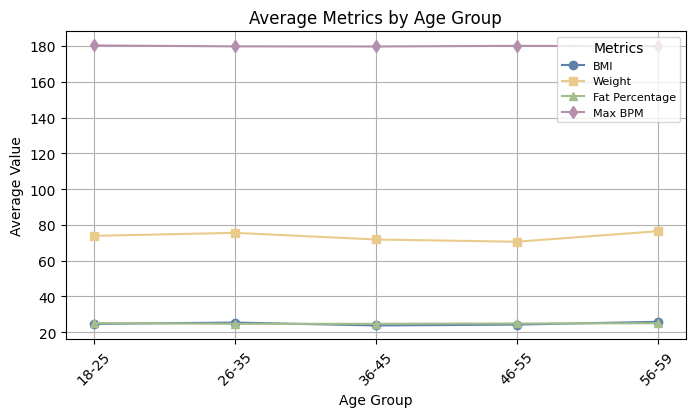

In [47]:
plt.figure(figsize=(8, 4))  
plt.plot(age_analysis.index, age_analysis['BMI'], marker='o', label='BMI', color='#5E81AC') 
plt.plot(age_analysis.index, age_analysis['Weight'], marker='s', label='Weight', color='#EBCB8B')  
plt.plot(age_analysis.index, age_analysis['Fat_Percentage'], marker='^', label='Fat Percentage', color='#A3BE8C')  
plt.plot(age_analysis.index, age_analysis['Max_BPM'], marker='d', label='Max BPM', color='#B48EAD') 
plt.title('Average Metrics by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.xticks(rotation=45)  
plt.legend(title="Metrics", loc='upper right', prop={'size': 8})
plt.grid(True)
plt.show()

At first, I thought about presenting the data in a bar chart, but since I couldn't effectively show the minor changes between the values, I chose to display it in a line graph. 

In the graph, you can see that the data for body fat percentage and BMI are nearly identical, causing the two lines to almost overlap.

**BMI:**
- The age group 18-25 shows the lowest BMI (24.48), while the age group 26-35 exhibits the highest BMI (25.10).
- As age increases, BMI remains relatively stable, with slight changes between the age groups.

**Weight:**
- The average weight does not show dramatic changes between the groups, but the age group 26-35 is the heaviest (74.81 kg), while the age group 46-55 is the lightest (69.47 kg).
- The weight in the age groups 18-25 and 56-59 is relatively similar, with an average weight of about 73.30 kg and 74.72 kg, respectively.

**Fat Percentage:**
- The fat percentage does not present significant differences between the groups, with averages ranging from 24.79% to 25.20%. The age group 26-35 shows the lowest fat percentage (24.79%).

**Max BPM:**
- The maximum heart rate remains relatively constant among the age groups, with numbers varying between 179.67 and 180.06. The age group 18-25 shows the highest maximum heart rate (180.06 BPM), while the group 56-59 shows the lowest (179.67 BPM). Minor changes between the age groups are why the line appears straight and uniform.

In general, there are slight changes in BMI and weight among the different age groups, while fat percentage and maximum heart rate show relative stability. Younger age groups tend to have higher BMI and heart rates, while older age groups demonstrate stability or slight decreases in these metrics.

## Question 2: What is the relationship between the type of workout and performance?

* Which type of workout is associated with higher BPM levels?

In [48]:
## Average heart rate during exercise by workout type:
bpm_vs_worktype=gym.groupby("Workout_Type")[["Max_BPM", "Avg_BPM", "Resting_BPM"]].mean().reset_index()
bpm_vs_worktype

,Workout_Type,Max_BPM,Avg_BPM,Resting_BPM
0,Cardio,179.453390,143.080508,62.046610
1,HIIT,180.288462,143.427885,62.923077
2,Strength,179.109705,144.219409,62.210970
3,Yoga,180.977273,143.100000,61.618182


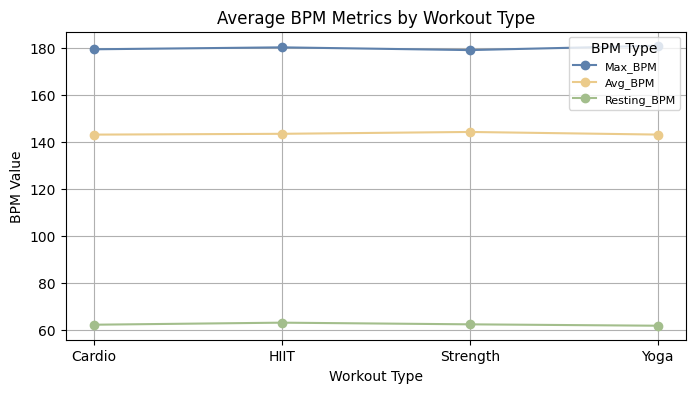

In [49]:
plt.figure(figsize=(8, 4)) 
custom_colors = ['#5E81AC', '#EBCB8B', '#A3BE8C']
for bpm_type, color in zip(["Max_BPM", "Avg_BPM", "Resting_BPM"], custom_colors):
    plt.plot(bpm_vs_worktype["Workout_Type"], bpm_vs_worktype[bpm_type], marker='o', label=bpm_type, color=color)

plt.title("Average BPM Metrics by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("BPM Value")
plt.legend(title="BPM Type", loc='upper right', prop={'size': 8})
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


This time, I also considered presenting the data in a bar graph, but since the changes are very minor, I chose to display the data in a line graph where we can observe the slight variations.

It's shows the average Max BPM for each workout type:  

- **Cardio**: The average maximum heart rate is 179.69.  
- **HIIT**: The average maximum heart rate is 180.15.  
- **Strength**: The average maximum heart rate is 179.03.  
- **Yoga**: The average maximum heart rate is 180.70.  

In general, the data indicates the impact of the type of workout on heart rate, showing that the figures are almost identical across all four workouts with no significant changes between them. However, it can be said that "Yoga" results in the highest maximum heart rate, while "Strength" has the lowest maximum heart rate. This may suggest that different types of workouts require varying levels of effort, directly influencing the maximum heart rate during exercise.

**Question No.3: Is there a connection between experience level (Beginner, Intermediate, Expert) and performance metrics (calories, BPM, BMI)?**

* Do gym members with higher experience levels work with higher BPM?

In [50]:
## Average calorie burning based on maximum heart rate, average heart rate, and resting heart rate:
bpm_vs_experience=gym.groupby("Experience_Level")[["Max_BPM", "Avg_BPM", "Resting_BPM"]].mean().reset_index()
bpm_vs_experience

,Experience_Level,Max_BPM,Avg_BPM,Resting_BPM
0,1,180.172012,143.172012,62.332362
1,2,179.479564,143.850136,61.937330
2,3,180.350785,143.251309,62.408377


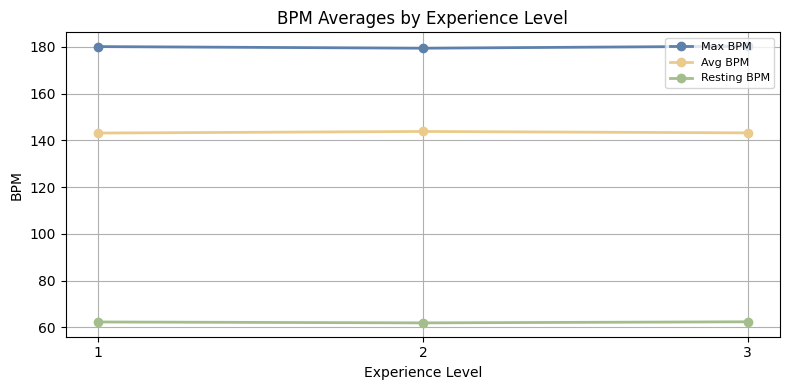

In [51]:
experience_levels = ['1', '2', '3']
max_bpm = [180.172012, 179.479564, 180.350785]
avg_bpm = [143.172012, 143.850136, 143.251309]
resting_bpm = [62.332362, 61.937330, 62.408377]

plt.figure(figsize=(8, 4)) 
plt.plot(experience_levels, max_bpm, marker='o', label='Max BPM', color='#5E81AC', linewidth=2)
plt.plot(experience_levels, avg_bpm, marker='o', label='Avg BPM', color='#EBCB8B', linewidth=2)
plt.plot(experience_levels, resting_bpm, marker='o', label='Resting BPM', color='#A3BE8C', linewidth=2)
plt.xlabel('Experience Level')
plt.ylabel('BPM')
plt.title('BPM Averages by Experience Level')
plt.xticks(experience_levels)
plt.legend(loc='upper right', prop={'size': 8})
plt.tight_layout()
plt.grid() 
plt.show()

**Experience Level and Maximum Heart Rate (Max BPM):**

The maximum heart rates of trainees across different experience levels are very close, with averages of 180.17, 179.48, and 180.35 beats per minute for levels 1, 2, and 3, respectively. This indicates that there is no significant difference in maximum heart rate between experience levels.

**Experience Level and Average Heart Rate (Avg BPM):**

Similarly, there are very small differences in average heart rates: 143.17, 143.85, and 143.25 beats per minute for levels 1, 2, and 3. The gaps between the average heart rates suggest that experience level has little effect on average heart rate.

**Experience Level and Resting Heart Rate (Resting BPM):**

Resting heart rates also show low variability, with averages of 62.33, 61.94, and 62.41 beats per minute. The differences between experience levels in this area are minimal, indicating that resting heart rate is relatively stable across experience levels.
General Summary:

The gragh suggests that there are no significant differences between the various experience levels regarding maximum heart rate, average heart rate, and resting heart rate.
It is possible that physical training or other factors have less impact on these metrics, indicating uniformity among different trainees.

## Question No.3: Is there a connection between experience level (Beginner, Intermediate, Expert) and performance metrics (calories, BPM, BMI)?

* Is there a difference in workout frequency per week based on experience levels?

In [52]:
## Average number of workouts per week based on experience levels:
experience_workout_freq=gym.groupby("Experience_Level")[["Workout_Frequency"]].mean()

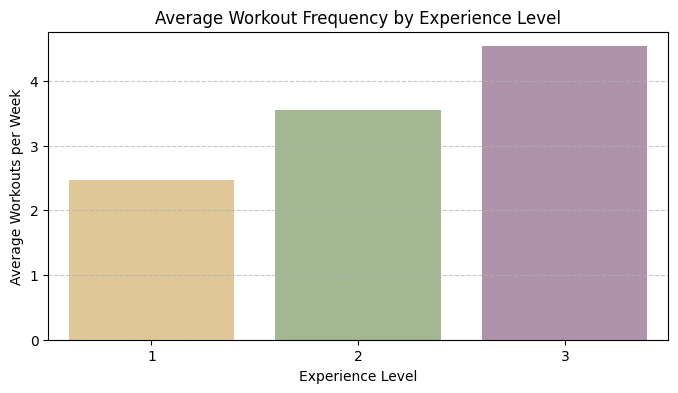

In [53]:
plt.figure(figsize=(8, 4)) 
sb.barplot(x=experience_workout_freq.index, y=experience_workout_freq['Workout_Frequency'], palette=['#EBCB8B', '#A3BE8C', '#B48EAD'])
plt.title('Average Workout Frequency by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Workouts per Week')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Training Frequency by Experience Level:**

* Experience Level 1 (Beginner): An average of 2.46 workouts per week, indicating a lower commitment to the training program compared to more advanced individuals.

* Experience Level 2 (Intermediate): A significant increase in training frequency, with an average of 3.55 workouts per week, suggesting that as experience increases, training frequency also rises.

* Experience Level 3 (Expert): The highest frequency, with an average of 4.53 workouts per week, indicating that more experienced trainees tend to train significantly more than beginners.

The graph shows a clear trend: as experience level increases, so does training frequency.
There are significant differences between experience levels, indicating that advanced trainees are likely more committed to their training program.

## Question No.4: What is the relationship between body fat percentage and workout goals?

* Do gym members with higher body fat percentages tend to perform different types of workouts (such as cardio versus strength training)?


In [54]:
## Number of trainees in each workout by body fat percentage groups:
fat_vs_workout = gym.groupby(['Fat_Group', 'Workout_Type']).size().unstack()
fat_vs_workout

Workout_Type,Cardio,HIIT,Strength,Yoga
Fat_Group,,,,
Very Low,21,30,22,26
Low,23,19,22,27
Moderate,45,42,47,43
High,92,77,91,87
Very High,55,40,55,37


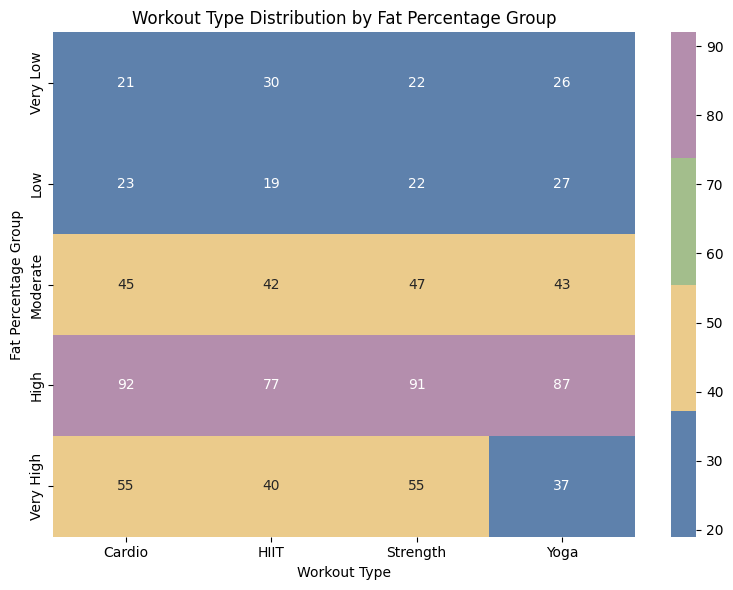

In [55]:
custom_colors = ['#5E81AC', '#EBCB8B', '#A3BE8C', '#B48EAD']
custom_cmap = sb.color_palette(custom_colors)

plt.figure(figsize=(8, 6)) 
norm = Normalize(vmin=fat_vs_workout.values.min(), vmax=fat_vs_workout.values.max())
sb.heatmap(fat_vs_workout, annot=True, cmap=custom_cmap, norm=norm)
plt.title('Workout Type Distribution by Fat Percentage Group')
plt.xlabel('Workout Type')
plt.ylabel('Fat Percentage Group')
plt.tight_layout()
plt.show()

**Summary of the data as shown in the heatmap:**

1. **"Very Low" Fat Percentage Group:**

   The highest number of trainees engage in "HIIT" workouts (30), followed by "Yoga" (26). The workout types "Strength" and "Cardio" are at the same level (22 and 21, respectively).

3. **"Low" Fat Percentage Group:**

   Here, "Yoga" is the most common workout type (27), followed by "Cardio" (23). "Strength" and "HIIT" are at the same level (22 and 19, respectively).

4. **"Moderate" Fat Percentage Group:**

   The workout types are more evenly distributed. "Strength" (47) and "Cardio" (45) are the most common, followed by "HIIT" (42) and "Yoga" (43).

6. **"High" Fat Percentage Group:**

   In this group, "Cardio" is the most common workout type (92), followed by "Strength" (91) and "Yoga" (87). "HIIT" is the least common workout type in this group (77).

8. **"Very High" Fat Percentage Group:**

   Again, "Cardio" is the most common workout type (55), followed by "Strength" (54). "HIIT" and "Yoga" are lower (39 and 37, respectively).

**General Conclusions:**
- As the fat percentage group increases, there is a clear tendency to prefer "Cardio" workouts and a high rate of "Strength" training among trainees with "Moderate" and "High" fat percentages.
- The workout types "HIIT" and "Yoga" are less common among groups with higher fat percentages.
- The group of trainees with "Very Low" fat percentages shows a more balanced distribution among workout types, with a preference for "HIIT" and "Yoga."

In the heatmap, you can clearly see the distribution and preferences of trainees across different workout types according to fat percentage groups, with darker colors representing higher values and lighter colors indicating lower values.

## Question No.5: Do demographic variables like gender affect performance?

* How does gender affect workout frequency and duration?

In [56]:
## Average workout frequency and duration by gender:
gender_analysis=gym.groupby("Gender")[["Workout_Frequency","Session_Duration"]].mean().reset_index()
gender_analysis

,Gender,Workout_Frequency,Session_Duration
0,Female,3.360360,75.987838
1,Male,3.330416,76.018818


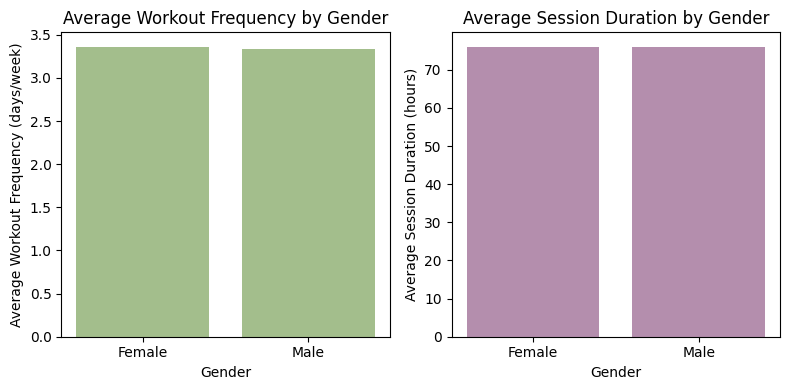

In [57]:
plt.figure(figsize=(8, 4))

## Graph for Workout Frequency:
plt.subplot(1, 2, 1)
plt.bar(gender_analysis['Gender'], gender_analysis['Workout_Frequency'], color='#A3BE8C')
plt.title('Average Workout Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Workout Frequency (days/week)')

## Graph for Session Duration:
plt.subplot(1, 2, 2)
plt.bar(gender_analysis['Gender'], gender_analysis['Session_Duration'], color='#B48EAD')
plt.title('Average Session Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Session Duration (hours)')

plt.tight_layout()
plt.show()

 **Workout Frequency:**

    Females: The average workout frequency is 3.36 times per week.
   
    Males: The average workout frequency is 3.33 times per week.
   
    The difference in workout frequency between the genders is minimal, with females working out slightly more often.

 **Session Duration:**

    Females: The average session duration is 75.99 minutes.

    Males: The average session duration is 76.02 minutes.

    Again, the difference in session duration between the genders is negligible, with males training for about 0.03 minutes longer on average.

**General Conclusions:**

Similar Frequency: There is a similar workout frequency between males and females, with a slight advantage for females.
 
Similar Duration: The workout duration for both genders is similar, indicating similar training habits.

Commitment to Training: The fact that both genders train with similar frequency and duration suggests a comparable commitment to maintaining physical fitness.

## Question No.6: Is there a relationship between water intake and performance during workouts?

* Do members who drink more water during the day burn more calories?

In [58]:
## Creating groups based on water intake:

water_bins = [1.5, 2, 2.5, 3, 3.5, 3.8]  
water_labels = ['1.5-2 liters', '2-2.5 liters', '2.5-3 liters', '3-3.5 liters', '3.5-3.7 liters']
gym['Water_Group'] = pd.cut(gym['Water_Intake'], bins=water_bins, labels=water_labels, right=False)

In [59]:
## Average calorie burn based on water intake:

water_vs_calories = gym.groupby('Water_Group')[['Calories_Burned']].mean()
water_vs_calories

,Calories_Burned
Water_Group,
1.5-2 liters,784.559701
2-2.5 liters,812.801653
2.5-3 liters,941.078125
3-3.5 liters,855.568966
3.5-3.7 liters,1164.287582


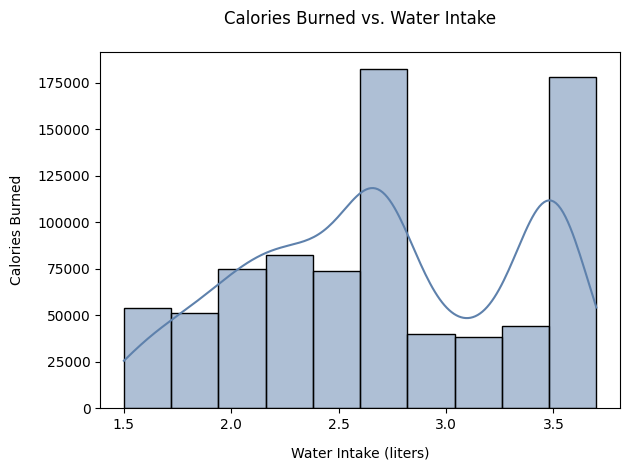

In [60]:
sb.histplot(data=gym, x='Water_Intake', weights='Calories_Burned', color='#5E81AC', alpha=0.5, bins=10, kde=True)
plt.title('Calories Burned vs. Water Intake', pad=20)
plt.xlabel('Water Intake (liters)', labelpad=10)
plt.ylabel('Calories Burned', labelpad=10)
plt.tight_layout()
plt.show()

This graph, which presents the relationship between calories burned and the amount of water consumed:

1. **The relationship between water intake and calorie burn**: It appears that there is a connection between the amount of water consumed and the number of calories burned. As the amount of water increases, there is an increase in the calories burned, but not in a direct and uniform manner.

2. **Peaks in calories burned**: There are two peak points where a large number of calories were burned. The first occurs when the water intake is 2.5 liters, and the second when it is 3.5 liters. This may indicate a phenomenon where the human body consumes more water, leading to an increase in calorie burn.

3. **Decrease after an increase**: After the increase in calories burned at 2.5 liters and 3.5 liters, there is a sharp decline in calorie burn, despite high water intake (such as at 3.0 liters). This may suggest that excessive water consumption does not necessarily lead to additional calorie burning.

4. **Non-linear correlation exists**: The graph indicates that the relationship between water intake and calorie burn is not linear, meaning there is no simple direct connection between the amount of water and the calories burned. The amount of water does not necessarily determine the amount of calories burned uniformly.

In summary, the conclusions suggest that water intake can influence calorie burn, but it is a non-linear relationship, and other factors may also play a role.

## Question No.6: Is there a relationship between water intake and performance during workouts?

* Is there a connection between water intake and body fat percentage?

In [61]:
## Average water intake based on body fat percentage:
water_vs_fat = gym.groupby('Water_Group')[['Fat_Percentage']].mean().reset_index()
water_vs_fat

,Water_Group,Fat_Percentage
0,1.5-2 liters,29.973134
1,2-2.5 liters,28.588843
2,2.5-3 liters,23.446875
3,3-3.5 liters,25.308621
4,3.5-3.7 liters,16.648366


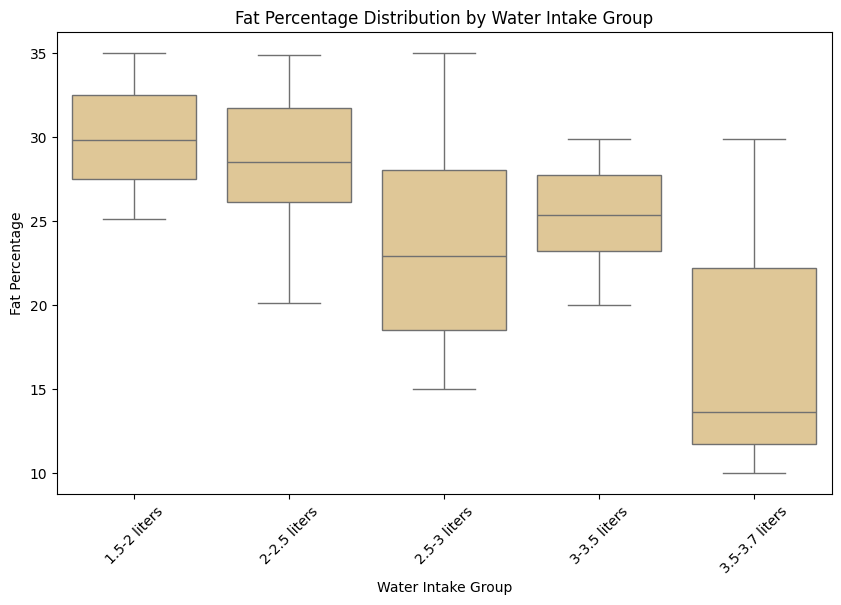

In [62]:
plt.figure(figsize=(10, 6)) 
sb.boxplot(x=gym['Water_Group'], y=gym['Fat_Percentage'], palette=['#EBCB8B'])  
plt.title('Fat Percentage Distribution by Water Intake Group')  
plt.xlabel('Water Intake Group')  
plt.ylabel('Fat Percentage')  
plt.xticks(rotation=45)  
plt.show()  

The data in the graph presents the relationship between water intake groups (1.5-2 liters, 2-2.5 liters, 2.5-3 liters, 3-3.5 liters, and 3.5-3.7 liters) and the average body fat percentage.

1. **1.5-2 liters**: The average body fat percentage is 29.97%.
2. **2-2.5 liters**: There is a decrease in body fat percentage to 28.59%.
3. **2.5-3 liters**: The body fat percentage decreases further to 23.45%.
4. **3-3.5 liters**: Here, we see an increase in body fat percentage to 25.31%, indicating an anomaly in the general trend.
5. **3.5-3.7 liters**: The body fat percentage continues to decrease to 15.84%.

In general, there is a trend of decreasing body fat percentage with increasing water intake, but there is an anomaly in the 3-3.5 liters group that requires further attention. The findings suggest that higher water consumption may impact body fat percentage, but there may be additional factors to consider in understanding the observed phenomena.

## Question No.7:  What is the impact of BMI on the type of workout chosen?

* Do gym members with high BMI tend to prefer different types of workouts?


In [63]:
## Preferences for workout types according to different BMI levels:
bmi_vs_workouttype = gym.groupby(['BMI_Group', 'Workout_Type']).size().unstack(fill_value=0).reset_index()
bmi_vs_workouttype

Workout_Type,BMI_Group,Cardio,HIIT,Strength,Yoga
0,Underweight,28,28,39,35
1,Normal,98,90,89,89
2,Overweight,64,49,66,63
3,Obese,46,41,43,33


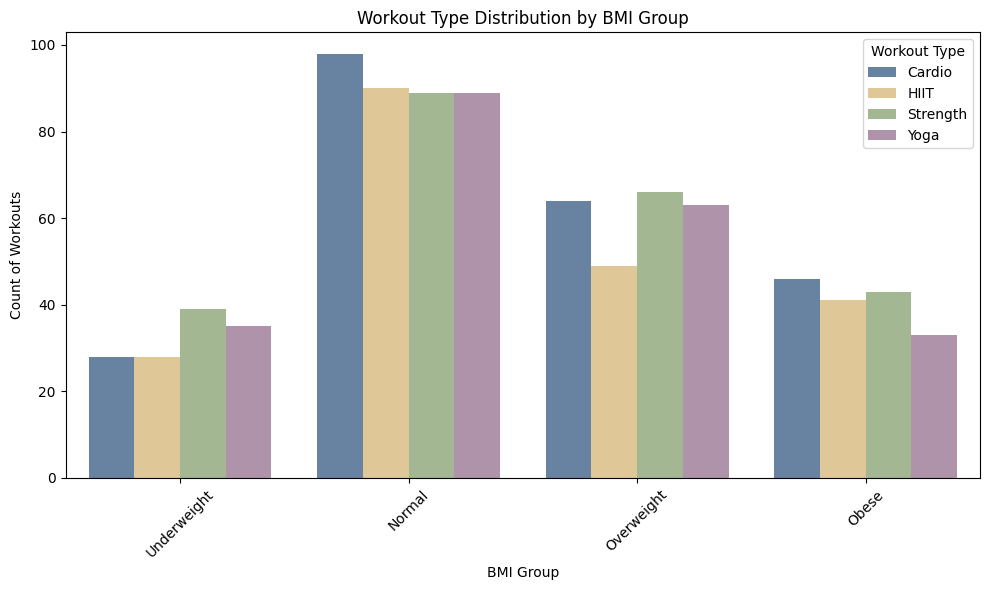

In [64]:
bmi_vs_workouttype_melted = bmi_vs_workouttype.melt(id_vars='BMI_Group', var_name='Workout_Type', value_name='Count')

plt.figure(figsize=(10, 6)) 
sb.barplot(data=bmi_vs_workouttype_melted, 
            x='BMI_Group', 
            y='Count', 
            hue='Workout_Type', 
            palette=['#5E81AC', '#EBCB8B', '#A3BE8C', '#B48EAD'])
plt.title('Workout Type Distribution by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Count of Workouts')
plt.legend(title='Workout Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph presents the number of participants in each BMI group according to different types of workouts:

1. **Underweight**: This group has the highest number of participants in Strength training (39), while there are 28 participants in both Cardio and HIIT.
2. **Normal**: The largest group, with 98 participants in Cardio, 90 in HIIT, 89 in Strength, and 89 in Yoga.
3. **Overweight**: The number of participants in workouts is 64 in Cardio, 49 in HIIT, 66 in Strength, and 63 in Yoga.
4. **Obese**: This group has the lowest number of participants in all types of workouts, especially in Yoga with 33 participants, while there are 46 in Cardio, 41 in HIIT, and 43 in Strength.

In general, it can be seen that the number of participants in Cardio workouts is higher in the lower BMI groups, while in the higher BMI groups, the variety of workout types is reduced.

## Question No.7:  What is the impact of BMI on the type of workout chosen?

 * Is there a relationship between BMI and workout frequency or workout duration?

In [65]:
## Average workout frequency and duration according to different BMI groups: 
bmi_vs_session = gym.groupby('BMI_Group')[["Workout_Frequency","Session_Duration"]].mean()
bmi_vs_session

,Workout_Frequency,Session_Duration
BMI_Group,,
Underweight,3.192308,70.458462
Normal,3.428962,78.124590
Overweight,3.388430,77.439669
Obese,3.214724,73.531288


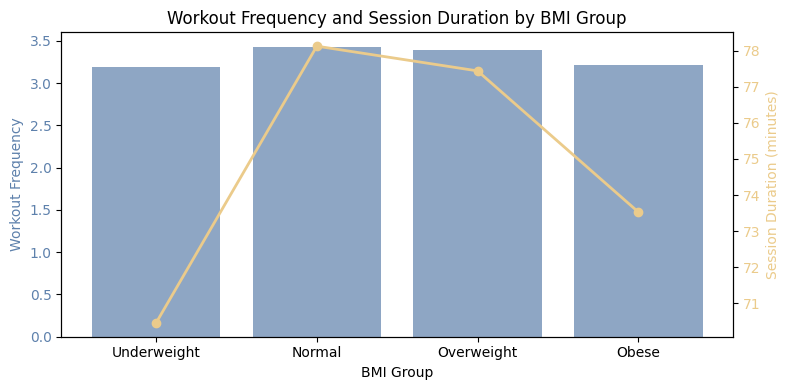

In [66]:
## BMI Data:
bmi_labels = bmi_vs_session.index
workout_frequency = bmi_vs_session['Workout_Frequency']
session_duration = bmi_vs_session['Session_Duration']

fig, ax1 = plt.subplots(figsize=(8, 4))

## Graph for Workout Frequency:
ax1.bar(bmi_labels, workout_frequency, color='#5E81AC', alpha=0.7, label='Workout Frequency')
ax1.set_xlabel('BMI Group')
ax1.set_ylabel('Workout Frequency', color='#5E81AC')
ax1.tick_params(axis='y', labelcolor='#5E81AC')

## Graph for Session Duration:
ax2 = ax1.twinx()
ax2.plot(bmi_labels, session_duration, color='#EBCB8B', marker='o', label='Session Duration', linewidth=2)
ax2.set_ylabel('Session Duration (minutes)', color='#EBCB8B')
ax2.tick_params(axis='y', labelcolor='#EBCB8B')

plt.title('Workout Frequency and Session Duration by BMI Group')
fig.tight_layout()
plt.show()

## Part 6 - Summary and Conclusions


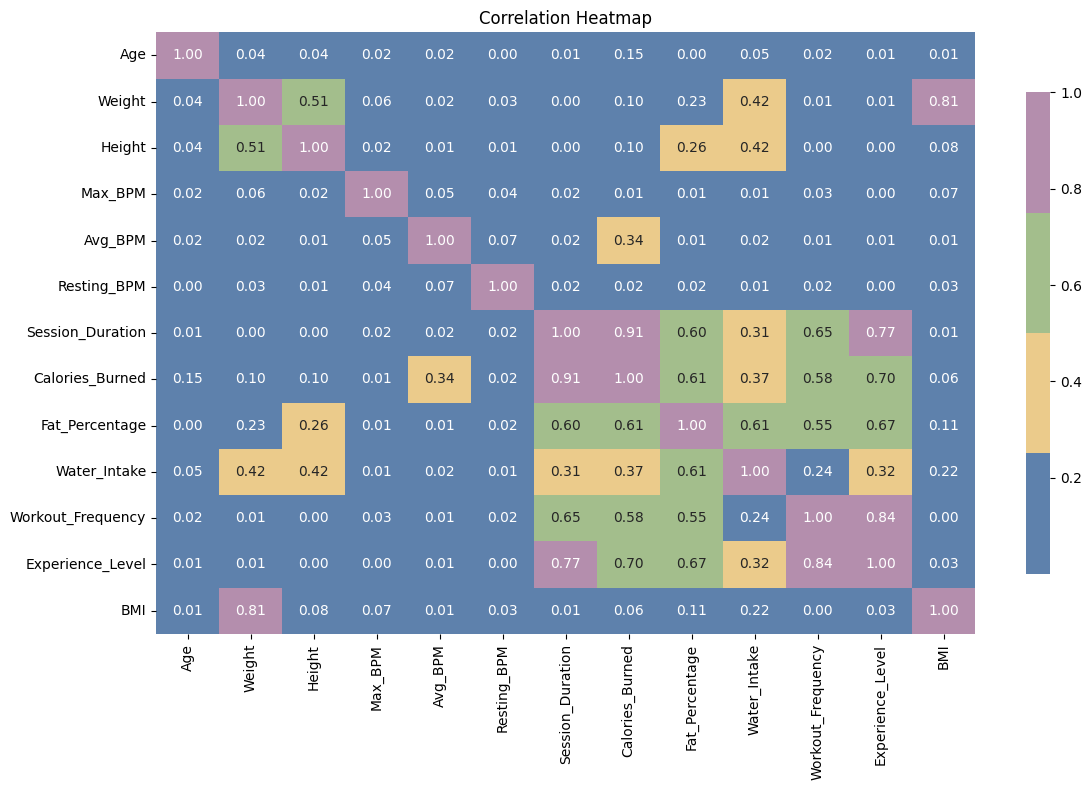

In [67]:
## Presenting the correlation in a heatmap for more effective conclusions:

plt.figure(figsize=(12, 8)) 

palette = ['#5E81AC', '#EBCB8B', '#A3BE8C', '#B48EAD']
custom_cmap = sb.color_palette(palette)

sb.heatmap(gym.corr(numeric_only=True).abs(), annot=True, cmap=custom_cmap, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.tight_layout()  
plt.show()

My research focused on the topic of gyms, with the main question being:

**How do the physiological, demographic, and behavioral factors of gym members affect their performance during workouts?**

I began my investigation by searching for suitable data on Kaggle, after which I uploaded the data to Jupyter. I explored the data and cleaned any outliers that affected the reliability of the research. I then performed correlations between the data and presented visualizations according to my sub-questions.

The findings of my research are:

There are no significant differences between the types of workouts and calorie burning. In other words, during yoga, which is a less intense workout, individuals burn the same number of calories as during HIIT, which is a very intense cardiovascular workout. Additionally, there are no significant differences between BMI and calorie burn, with a normal BMI burning the most calories during workouts.

In graphs where we did see differences: in the gender graph, we observed that women burn fewer calories than men by almost 100 calories per workout. This is likely due to physiological differences between genders, including muscle mass, hormones, nutrition, and so on. Men and women train an equal average number of times per week, and their workout durations are also similar.

Moreover, we found that as a gym member's age increases, they burn fewer calories. There is an inverse relationship between age and calorie burn. In terms of experience level, more experienced gym-goers burn more calories during workouts, but we also observed that experienced gym members have a greater frequency of workouts per week, and their workout duration is longer.

Additionally, the lower the body fat percentage, the easier it is to burn calories; thus, individuals with very high body fat percentages struggle significantly to burn calories during workouts. The longer the workout, the more calories are burned, which is a self-evident finding.

Furthermore, we saw no significant differences between age groups concerning physiological variables like BMI, weight, body fat percentage, and max BPM. It can be observed that the more water consumed throughout the day, the lower the body fat percentage. There are also no differences between the types of workouts or the experience level in their effect on the athlete's heart rate at different times.

People with Normal BMI or slight Overweight tend to train more frequently and for longer durations. In contrast, those at the extremes (Underweight and Obese) have shorter and less frequent workouts.
    